### Bayesian Classifier, likelihood ratio - yəni iki Ehtimalın nisbəti

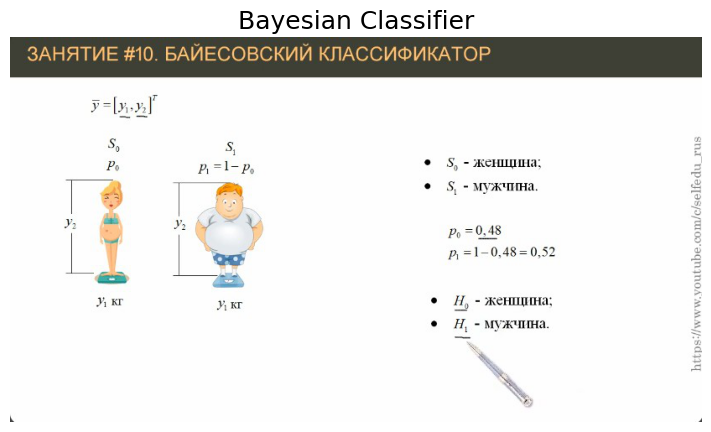

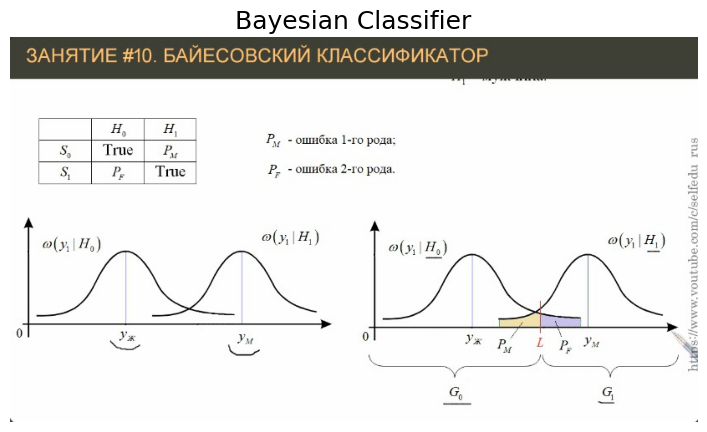

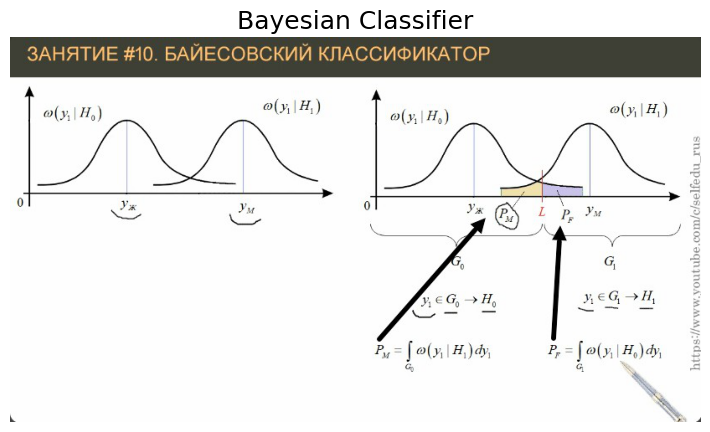

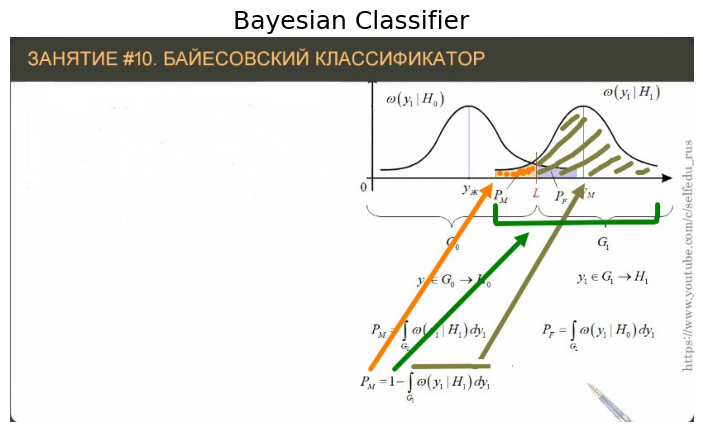

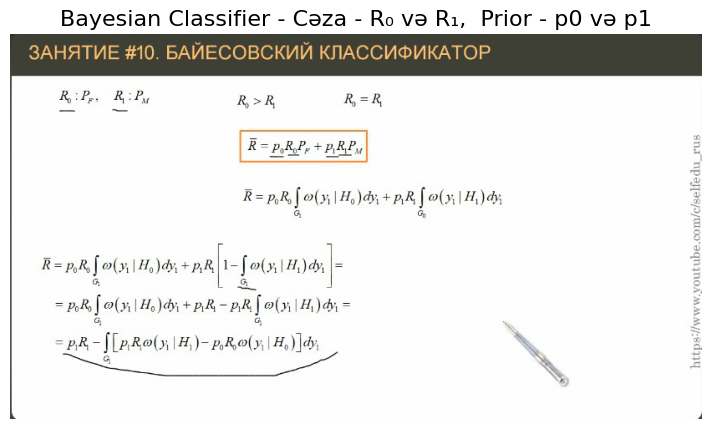

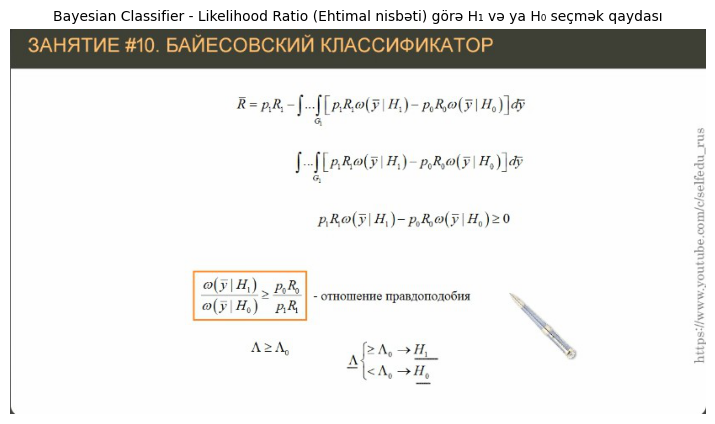

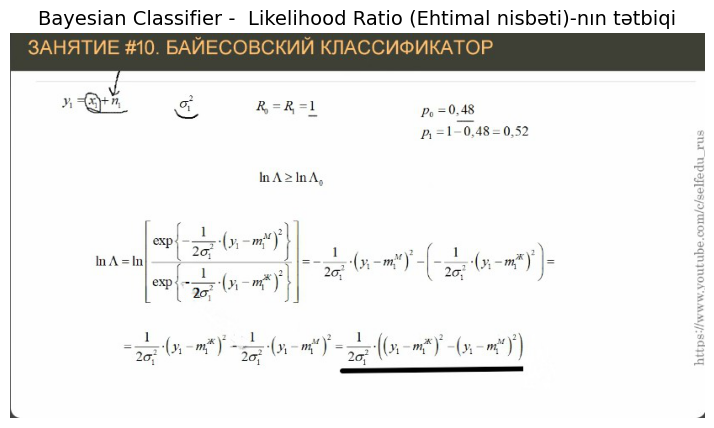

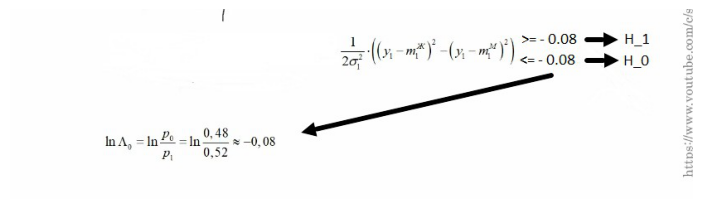

In [19]:
from PIL import Image

# Fayl yolunun əsas hissəsi
base_path = r'C:\Users\dell\Desktop\Selfedu\Optimization Algorithms\Pictures\DSP_10_'

# Şəkilləri saxlayacağımız siyahı
image_list = []

# 1-dən 5-ə qədər olan şəkilləri dövr ilə açırıq
for i in range(1, 9):  # 1-dən 5-ə qədər
    full_path = f'{base_path}{i}.jpg'  # Fayl yolunu dinamik olaraq yaradırıq
    img = Image.open(full_path)
    image_list.append(img)  # Şəkili siyahıya əlavə edirik

# Nəticə: images siyahısında bütün yüklənmiş şəkillər olacaq

import matplotlib.pyplot as plt

# Şəkilləri göstərin
for i, image in enumerate(image_list):
    if i == 7:
        plt.figure(figsize=(8.8, 4))      
    else:     
        plt.figure(figsize=(25, 5))  # Şəkilin ölçüsü    
        
    if i < 4:
        plt.title("""Bayesian Classifier""", size='18')
    elif i < 5:
        plt.title("""Bayesian Classifier - Cəza - R₀ və R₁,  Prior - p0 və p1""", size='16')
    elif i < 6:
        plt.title("""Bayesian Classifier - Likelihood Ratio (Ehtimal nisbəti) görə H₁ və ya H₀ seçmək qaydası""", size='10')
    elif i < 7:
        plt.title("""Bayesian Classifier -  Likelihood Ratio (Ehtimal nisbəti)-nın tətbiqi""", size='14')
    elif i < 8:
        plt.title("""""", size='12')        
        
    plt.imshow(image)
    plt.axis('off')  # Oxları gizlətmək üçün
    plt.show()

### Python ilə test - Likelihood Ratio (Ehtimal nisbəti)-nın tətbiqi
- **Qadın($H_0$) üçün Paylanma yaradırıq və yoxlayırıq ki, nə qədər Səhvən Kişi($H_1$) Proqnoz olundu.**

In [18]:
# NumPy kitabxanasını idxal edirik, bu kitabxana statistik və riyazi hesablamalar üçün istifadə olunur
import numpy as np

def getL(y1, m1_F, m1_M, d1):
    # Bu funksiya L(y) likelihood nisbətini hesablayır (yəni müşahidə olunan dəyərin kişi və qadın paylanmalarına görə fərqi)
    res = 1/(2*d1)*((y1-m1_F)**2 - (y1-m1_M)**2)
    return res

def getL0(p0, p1):
    # Bu funksiya prior ehtimalların log nisbətini hesablayır
    return np.log(p0/p1)

m1_F = 60   # Qadınların orta çəkisi (kilogram)
m1_M = 85   # Kişilərin orta çəkisi (kilogram)

d1 = 9     # Çəkinin dispersiyası (variance, kg^2) - hər ikisini eyni götürürük

p0 = 0.48   # Qadın olmaq ehtimalı (prior)
p1 = 0.52   # Kişi olmaq ehtimalı (prior)

N = 100     # Təcrübələrin sayı (nümunə sayı)

# L0 prior ehtimalların log nisbətini verir, bunu qərar həddi kimi istifadə edəcəyik
L0 = getL0(p0, p1)

# nM dəyişəni kişi kimi düzgün təyin olunan nümunələrin sayını saxlamaq üçün
nM = 0

# 100 dəfə təkrar nümunə çəkirik
for i in range(N):
    # Qadın paylanmasına görə təsadüfi çəkilər yaradırıq (normal paylanma, m1_F ortalama, d1 dispersiya)
    y1 = np.random.normal(m1_F, d1)

    # Bu y1 nümunəsi üçün likelihood nisbətini hesablayırıq
    L = getL(y1, m1_F, m1_M, d1)
    
    # Səhv edib-etmədiyimizi yoxlayırıq: kişi kimi təyin etsək deməli səhv etmişik
    if(L >= L0): # Əgər likelihood nisbəti prior log nisbətindən böyükdürsə, nümunəni kişi kimi təyin edirik
        print("Мужчина-", f"m1_M = {y1},", f"L = {L},", f"L0 = {L0}")
         # kişi kimi təyin olunan nümunələrin sayını artırırıq
        nM += 1
        
    # Əks halda nümunəni qadın kimi təyin edirik
    else:
        print("Женщина-", f"m1_F = {y1},",  f"L = {L},", f"L0 = {L0}")
        
# Yanlış təyin olunanların faizi (burada kişi kimi təyin olunanların faizi, yəni qismən error)
error = nM/N*100
# Nəticəni yuvarlaqlaşdırılmış faiz şəklində çap edirik
print(f"Ошибка: {np.round(error, 2)}%")

Женщина- m1_F = 64.62464264403475, L = -21.875992655459026, L0 = -0.0800427076735365
Женщина- m1_F = 52.77309427040992, L = -54.796960359972445, L0 = -0.0800427076735365
Женщина- m1_F = 66.56784253507375, L = -16.478215180350688, L0 = -0.0800427076735365
Женщина- m1_F = 66.25545833784209, L = -17.345949061549764, L0 = -0.0800427076735365
Женщина- m1_F = 61.52103010679102, L = -30.497138592247172, L0 = -0.0800427076735365
Женщина- m1_F = 68.37766217870248, L = -11.450938392493113, L0 = -0.0800427076735365
Женщина- m1_F = 55.607874577484026, L = -46.92257061809993, L0 = -0.0800427076735365
Женщина- m1_F = 35.64192210497393, L = -102.38354970840575, L0 = -0.0800427076735365
Женщина- m1_F = 51.818591094967076, L = -57.44835806953591, L0 = -0.0800427076735365
Женщина- m1_F = 62.25415301591414, L = -28.46068606690516, L0 = -0.0800427076735365
Женщина- m1_F = 54.39450120839898, L = -50.29305219889172, L0 = -0.0800427076735365
Женщина- m1_F = 57.397143377113125, L = -41.95237950801909, L0 = -0

### $\bar{R} = p_1 R_1 - \int_{G_1} \left[ p_1 R_1 \omega(\bar{y} | H_1) - p_0 R_0 \omega(\bar{y} | H_0) \right] d\bar{y}$ düsturun izahı

- Bu düsturlar **statistik qərarlar nəzəriyyəsində** istifadə olunan və **iki hipotezi (H₀ və H₁)** test etmək üçün **likelihood ratio (ehtimal nisbəti)** qaydasını izah edir.  
- Məsələn, siqnal emalında, tibbi diaqnostikada, radarda, statistik yoxlamada “siqnal var ya yox” kimi vəziyyətlərdə istifadə edilir.

---

**1-ci sətir:**
$$
\bar{R} = p_1 R_1 - \int_{G_1} \left[ p_1 R_1 \omega(\bar{y} | H_1) - p_0 R_0 \omega(\bar{y} | H_0) \right] d\bar{y}
$$

- Bu, **orta risk** (average risk) düsturudur.
- $p_1$, $p_0$ — H₁ və H₀ hipotezlərinin a priori ehtimalları.
- $R_1$, $R_0$ — uyğun qərarların qiymətləri (məs. düzgün qərar üçün 0, səhv üçün 1 və s.).
- $\omega(\bar{y} | H_i)$ — $H_i$ hipotezi doğru olduqda müşahidənin $\bar{y}$ olmasının şərti ehtimal sıxlığı.
- $G_1$ — H₁ hipotezinin qəbul edildiyi bölgə.
- Birinci həd $p_1 R_1$ — H₁ doğru olduqda riskin sabit hissəsi.
- İnteqral — qərar bölgəsində dəyişən riski ifadə edir.

**Məqsəd:** $G_1$ bölgəsini elə seçmək ki, $\bar{R}$ minimal olsun.

---

**2-ci sətir:**
$$
\int_{G_1} \left[ p_1 R_1 \omega(\bar{y} | H_1) - p_0 R_0 \omega(\bar{y} | H_0) \right] d\bar{y}
$$

- Bu, sadəcə birinci sətirdəki inteqralın açıq şəkildə yazılışıdır.
- Bu ifadəni **minimallaşdırmaq üçün** inteqralın altındakı ifadəni aşağı salmaq lazımdır.

---

**3-cü sətir:**
$$
p_1 R_1 \omega(\bar{y} | H_1) - p_0 R_0 \omega(\bar{y} | H_0) \geq 0
$$

- Bu, **qərar bölgəsi $G_1$ üçün şərt** kimi götürülür.
- Yəni, $G_1$ bölgəsində bu ifadə mənfi olmamalıdır, çünki o zaman H₁ seçmək riski azaldar.
- Prinsip: $\bar{y}$ nümunəsini $G_1$-ə əlavə etsək və bu ifadə mənfi olarsa, orta risk artar.

---

**4-cü sətir:**
$$
\frac{\omega(\bar{y} | H_1)}{\omega(\bar{y} | H_0)} \geq \frac{p_0 R_0}{p_1 R_1}
$$

- Bu əvvəlki bərabərsizliyin yenidən təşkilidir.
- Sol tərəf **likelihood ratio (ehtimal nisbəti)** $\Lambda(\bar{y}) = \frac{\omega(\bar{y} | H_1)}{\omega(\bar{y} | H_0)}$.
- Sağ tərəf **sərhəd dəyəri** $\Lambda_0 = \frac{p_0 R_0}{p_1 R_1}$.
- **Nəticə:** H₁ qərarı vermək üçün $\Lambda(\bar{y}) \geq \Lambda_0$ olmalıdır.

---

**5-ci sətir:**  
`- отношение правдоподобия` — Azərbaycan dilində: **“ehtimal nisbəti”** (likelihood ratio).

---

**6-cı və 7-ci sətirlər:**
$$
\Lambda \geq \Lambda_0
$$
$$
\Lambda
\begin{cases}
\begin{array}{ll}
\ge \Lambda_0 & \rightarrow H_1 \\
<  \Lambda_0 & \rightarrow H_0
\end{array}
\end{cases}
$$

- Bu, **Neyman–Pearson lemmasının** əsas qaydasıdır.
- **Səbəbi:**  
  - $\Lambda$ böyük olduqda, müşahidə $\bar{y}$ H₁ altında H₀-a nisbətən daha çox ehtimal olunandır.
  - Hər hansı sabit səhv ehtimalları üçün $\Lambda \geq \Lambda_0$ olduqda H₁ seçmək **deteksiya ehtimalını artırır**, yanlış qərar riskini azaldır.
  - Riyazi olaraq: orta riski minimum edən qərar qaydası budur.

---

**Qərar qaydasının məntiqi:**  
Likelihood ratio $\Lambda(\bar{y})$ müşahidənin hansı hipotezə “uyğun” olduğunu ölçür.  
$\Lambda_0$ isə əvvəlcədən verilmiş ehtimallara ($p_0, p_1$) və itki dəyərlərinə ($R_0, R_1$) əsasən hesablanır.

**Nə üçün $\Lambda \geq \Lambda_0$ olanda H₁ seçilir?**  
Çünki bu o deməkdir ki, müşahidə H₁ altında H₀-a nisbətən **ən azı $\Lambda_0$ qədər daha çox ehtimal olunur**.  
Bu şərti sağlamayan müşahidələr H₀ hipotezinə aid edilir.

---

**Ümumi anlayış:**  
Bu yanaşma **Bayes qərar nəzəriyyəsi** və ya **Neyman–Pearson meyarı** çərçivəsində optimal detektor dizaynı üçün istifadə olunur.  
Məsələn, radarda: $\Lambda$ siqnalın olub-olmaması ehtimalının nisbətidir; müəyyən bir sərhəddi keçərsə “siqnal var” deyilir.

### $\frac{\omega(\bar{y} | H_1)}{\omega(\bar{y} | H_0)} \ge \frac{p_0 R_0}{p_1 R_1}$ olarsa, niyə $H_1$ seçilir?

#### **1. Nədir bu $\frac{\omega(\bar{y} | H_1)}{\omega(\bar{y} | H_0)}$ ?**

Bu **likelihood ratio** (ehtimal nisbəti) adlanır.  
Məsələn:

- $\omega(\bar{y} | H_1)$ → **H₁ doğru olsa**, bizim müşahidə etdiyimiz $\bar{y}$ dəyərinin ehtimal sıxlığı.
- $\omega(\bar{y} | H_0)$ → **H₀ doğru olsa**, eyni $\bar{y}$ dəyərinin ehtimal sıxlığı.

**Misal:**  
H₁: "Bu siqnal var"  
H₀: "Bu siqnal yoxdur"  
Müşahidə: Müəyyən bir elektrik siqnalının gücü $\bar{y}$ gəlir.

- Əgər $\bar{y}$ böyükdürsə, o vaxt siqnal olduğu halda (H₁) bu dəyəri görmək ehtimalı **yüksək**, siqnal olmadığı halda (H₀) isə **aşağı** olar.  
Deməli, **kəsir nisbət** $\frac{\omega(\bar{y} | H_1)}{\omega(\bar{y} | H_0)}$ böyük olar.

- Əgər $\bar{y}$ kiçikdirsə, siqnal yox ikən (H₀) onu görmək ehtimalı daha yüksək olar, nisbət **kiçik** olar.

---

#### **2. Niyə böyük olanda H₁ seçirik?**

Çünki bu nisbət **hansı hipotezin daha "ehtimal oluna bilən" olduğunu** göstərir:

- Nisbət böyük → $\bar{y}$ H₁ altında H₀-a nisbətən **daha çox ehtimal olunan** bir dəyərdir. Deməli, H₁ daha inandırıcıdır.
- Nisbət kiçik → $\bar{y}$ H₀ altında daha çox ehtimal olunur, deməli H₀ daha inandırıcıdır.

---

#### **3. Sərhəd dəyəri $\Lambda_0 = \frac{p_0 R_0}{p_1 R_1}$ haradan gəlir?**

Bu sərhəd dəyəri **risk minimizasiyası** ilə tapılır.  
$p_0$ — H₀-nin əvvəl ehtimalı, $R_0$ — H₀ doğru olanda H₁ seçmənin itkisi (məsələn, yanlış həyəcan itkisi).  
$p_1$ — H₁ ehtimalı, $R_1$ — H₁ doğru olanda H₀ seçmənin itkisi (məsələn, qaçırılmış siqnal itkisi).

Bu ədədlər sabitdir.  
$\Lambda_0$ böyük olarsa, deməli, $p_0 R_0$ böyükdür — bu o deməkdir ki, **H₀-ni səhv rədd etmək bahalıdır**, ona görə ancaq çox böyük likelihood ratio olanda H₁ deyirik (daha "mühafizəkar" detektor).

---

#### **4. Qərar qaydası:**

Əgər:

$$
\frac{\omega(\bar{y} | H_1)}{\omega(\bar{y} | H_0)} \ge \frac{p_0 R_0}{p_1 R_1}
$$

Bu o deməkdir ki, müşahidənin H₁ altında olma ehtimalı o qədər yüksəkdir ki, H₁ seçsək **orta risk azalır** (statistik cəhətdən optimaldır).

Əks halda ($< \Lambda_0$), H₀ seçmək daha yaxşıdır.

---

#### **5. Başqa bir izah (intuitiv):**

Təsəvvür edək:

- H₀: "Xəstə deyil"
- H₁: "Xəstədir"
- Müşahidə: Laboratoriya testinin dəyəri $\bar{y}$

Test dəyəri çox yüksək olarsa (siqnal güclü), likelihood ratio böyük olur → "Xəstədir" (H₁) deyirik.

Test dəyəri aşağı olarsa → "Sağlamdır" (H₀) deyirik.

Sərhəd $\Lambda_0$ isə xəstəliyin nadir olub-olmadığına ($p_0,p_1$) və səhv diaqnozun nəticələrinə ($R_0,R_1$) görə təyin olunur.  
Məsələn, xəstəlik nadirdirsə ($p_1$ kiçik), o zaman həddi **yüksək** qoymaq lazımdır ki, çox sayda yanlış müsbət nəticə olmasın.

---

**Xülasə:**  
Böyük likelihood ratio → müşahidə H₁ ilə daha uyğundur → H₁ seçirik.  
Kiçik ratio → H₀ ilə daha uyğundur → H₀ seçirik.  
Sərhəd isə itkilərdən və əvvəl ehtimallardan asılıdır.